In [2]:
with open('data/advent6.num', 'r') as f:
    ages = f.read()
ages = [int(x) for x in ages.split(',')]
#ages = [3,4,3,1,2]

In [3]:
def simulate_day(ages):
    new_ages, new_repr = [], []
    ages = [age - 1 for age in ages]
    for i, a in enumerate(ages):
        if a == -1: # Reproduce
            ages[i] = 6
            new_ages += [8]
            new_repr += [6]
    ages += new_ages
    return (ages)

iterations = 80
for i in range(iterations):
    ages = simulate_day(ages)
    #print(i+1, "days: ", len(ages))

print(len(ages))

389726


In [4]:
# Second try
def to_fish_count(ages):
    result = [0] * 9
    for i in range(9):
        result[i] = ages.count(i)
    return result

def simulate_day(fish_count):
    new_count = fish_count[0]
    fish_count.pop(0)
    fish_count += [new_count] # number of new fish
    fish_count[6] += new_count # old fish on cooldown
    return fish_count

#def simulate_day(fish):
#    return [fish[1], fish[2], fish[3], fish[4], fish[5], fish[6], fish[7] + fish[0], fish[8], fish[0]]

def get_fish(iterations=256):
    fish_count = to_fish_count(ages)
    num_fish = [sum(fish_count)]

    for i in range(iterations):
        fish_count = simulate_day(fish_count)
        num_fish += [sum(fish_count)]
        #print(i+1, "days: ", fish_count)

    return sum(fish_count), num_fish

result, num_fish = get_fish(256)
print(result)


1849066218384004


<AxesSubplot:>

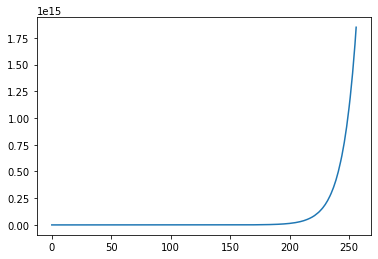

In [5]:
import pandas as pd
pd.Series(num_fish).plot()

In [8]:
from ipywidgets import interact
interact(lambda iterations: get_fish(iterations)[0], iterations=256)

interactive(children=(IntSlider(value=256, description='iterations', max=768, min=-256), Output()), _dom_class…

<function __main__.<lambda>(iterations)>